In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# PREDICTING DIABETES

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("/kaggle/input/dataset/health care diabetes.csv")  # Replace "your_dataset.csv" with the path to your dataset

# Preprocessing: Replace zeros with NaN
data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, float('nan'))

# Drop rows with NaN values
data.dropna(inplace=True)

# Split dataset into features and target variable
X = data.drop(columns=['Outcome'])
y = data['Outcome']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()

# Train classifiers
rf_classifier.fit(X_train_scaled, y_train)
knn_classifier.fit(X_train_scaled, y_train)
svm_classifier.fit(X_train_scaled, y_train)

# Predictions
rf_predictions = rf_classifier.predict(X_test_scaled)
knn_predictions = knn_classifier.predict(X_test_scaled)
svm_predictions = svm_classifier.predict(X_test_scaled)

# Calculate accuracies
rf_accuracy = accuracy_score(y_test, rf_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print("Random Forest Accuracy:", rf_accuracy)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Support Vector Machine Accuracy:", svm_accuracy)


Random Forest Accuracy: 0.7974683544303798
K-Nearest Neighbors Accuracy: 0.7468354430379747
Support Vector Machine Accuracy: 0.7468354430379747


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize classifiers
logreg_classifier = LogisticRegression(random_state=42)
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train classifiers
logreg_classifier.fit(X_train_scaled, y_train)
dt_classifier.fit(X_train_scaled, y_train)

# Predictions
logreg_predictions = logreg_classifier.predict(X_test_scaled)
dt_predictions = dt_classifier.predict(X_test_scaled)

# Calculate accuracies
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)

print("Logistic Regression Accuracy:", logreg_accuracy)
print("Decision Tree Accuracy:", dt_accuracy)


Logistic Regression Accuracy: 0.7721518987341772
Decision Tree Accuracy: 0.7088607594936709


In [15]:
import xgboost as xgb

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Make predictions
xgb_predictions = xgb_classifier.predict(X_test_scaled)

# Calculate accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)

print("XGBoost Accuracy:", xgb_accuracy)



XGBoost Accuracy: 0.7341772151898734


# COMPARISON OF ACCURACY OF DIFFERENT MODELS

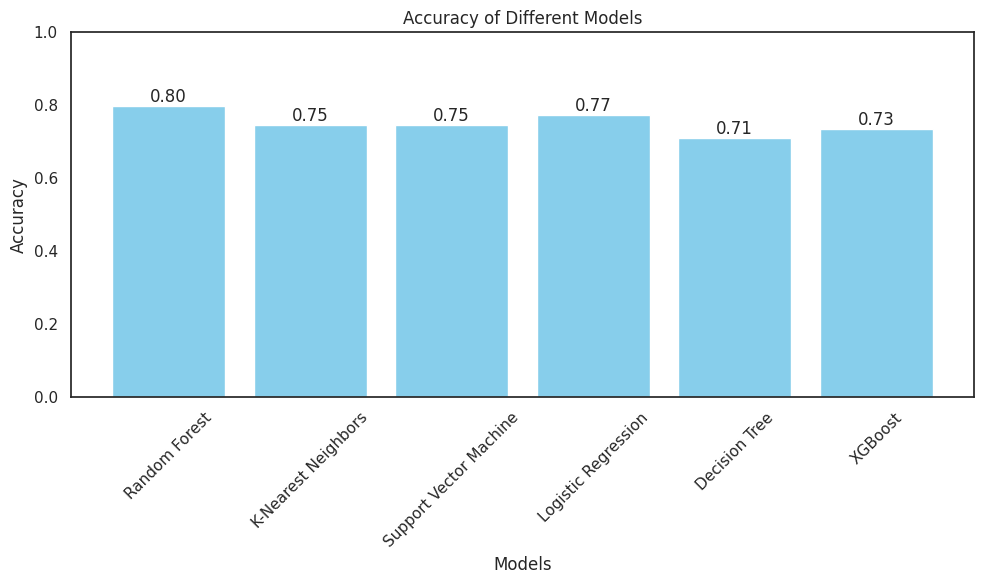

In [94]:
import matplotlib.pyplot as plt

# Accuracy scores of each model
models = ['Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression', 'Decision Tree', 'XGBoost']
accuracies = [rf_accuracy, knn_accuracy, svm_accuracy, logreg_accuracy, dt_accuracy, xgb_accuracy]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color='skyblue')
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1
plt.xticks(rotation=45)
plt.tight_layout()

# Annotate each bar with its accuracy value
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', 
             ha='center', va='bottom')
# Show plot
plt.show()


**ATTRIBUTE DISTRIBUTION IN DATASET**

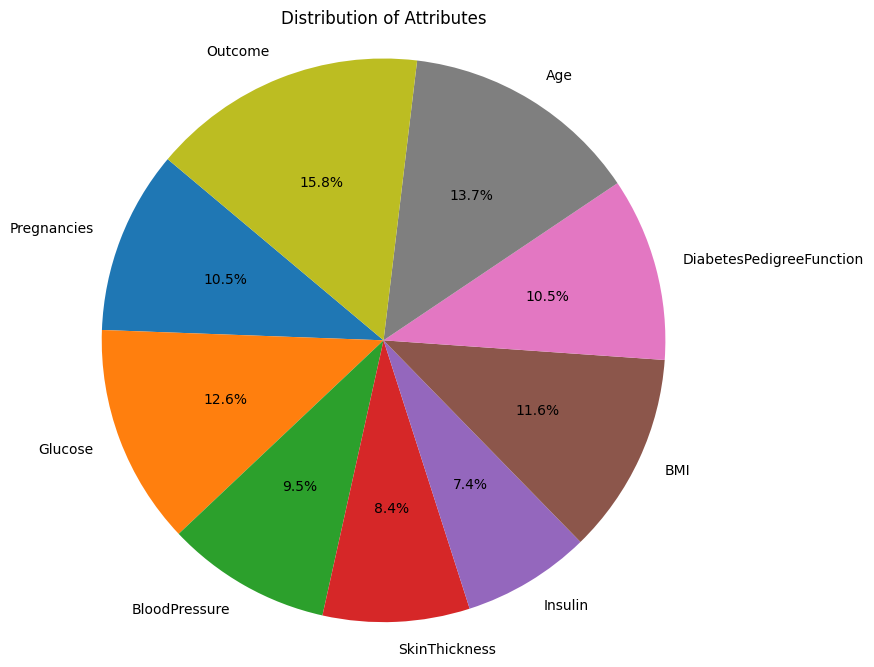

In [24]:
import matplotlib.pyplot as plt

# Define the attributes and their counts (sample data)
attributes = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
counts = [100, 120, 90, 80, 70, 110, 100, 130, 150]  # Sample counts

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=attributes, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Attributes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()


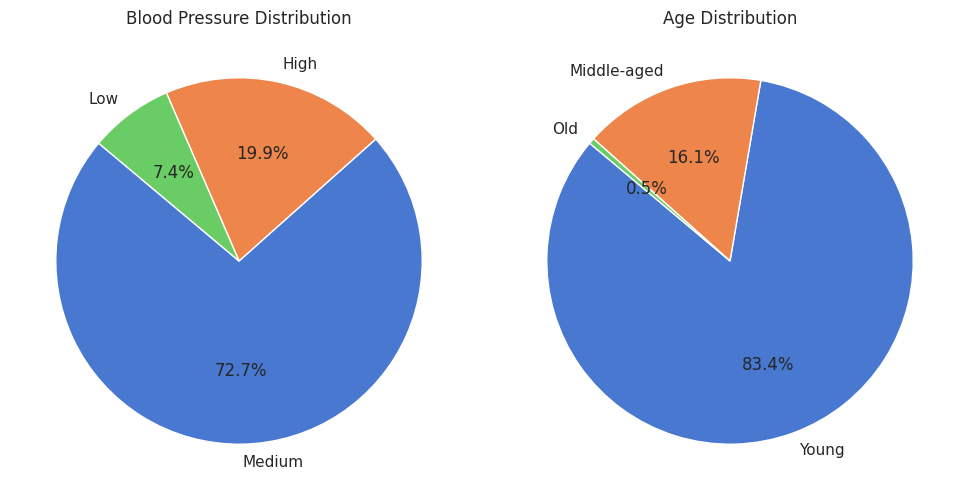

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Discretize blood pressure and age
data['BloodPressureCategory'] = pd.cut(data['BloodPressure'], bins=3, labels=['Low', 'Medium', 'High'])
data['AgeCategory'] = pd.cut(data['Age'], bins=3, labels=['Young', 'Middle-aged', 'Old'])

# Count the occurrences of each category
blood_pressure_counts = data['BloodPressureCategory'].value_counts()
age_counts = data['AgeCategory'].value_counts()

# Create pie chart for blood pressure
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(blood_pressure_counts, labels=blood_pressure_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Blood Pressure Distribution')

# Create pie chart for age
plt.subplot(1, 2, 2)
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution')

plt.tight_layout()
plt.show()


# RANDOM FOREST CLASSIFIER

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate mean squared error (MSE)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Calculate R-squared
rf_r_squared = r2_score(y_test, rf_predictions)

# Calculate root mean squared error (RMSE)
rf_rmse = np.sqrt(rf_mse)

print("Mean Squared Error (MSE):", rf_mse)
print("R-squared:", rf_r_squared)
print("Root Mean Squared Error (RMSE):", rf_rmse)


Mean Squared Error (MSE): 0.20253164556962025
R-squared: 0.09971509971509951
Root Mean Squared Error (RMSE): 0.4500351603704096


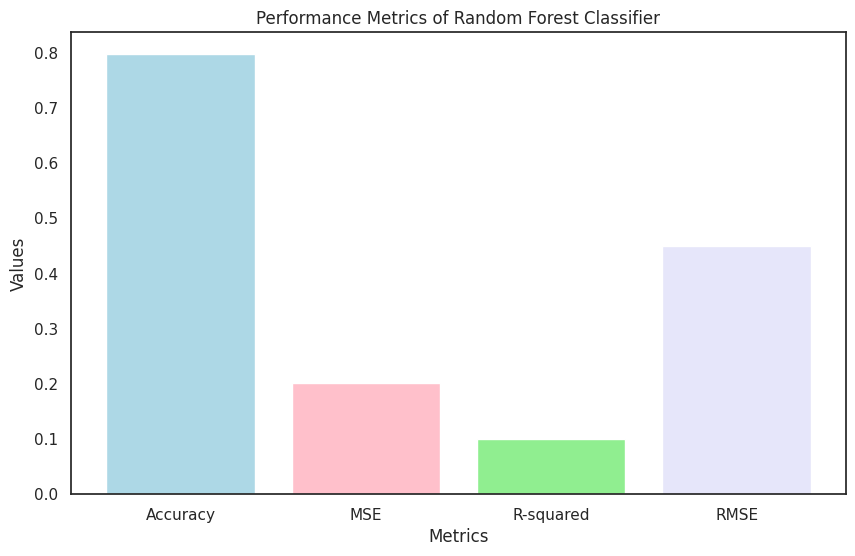

In [75]:
import matplotlib.pyplot as plt

# Define the values
metrics = ['Accuracy', 'MSE', 'R-squared', 'RMSE']
values = [rf_accuracy, rf_mse, rf_r_squared, rf_rmse]
colors = ['lightblue', 'pink', 'lightgreen', '#E6E6FA']

# Plot the metrics
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Performance Metrics of Random Forest Classifier')
plt.show()

# KNN CLASSIFIER

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate MSE
knn_mse = mean_squared_error(y_test, knn_predictions)

# Calculate R-squared
knn_r_squared = r2_score(y_test, knn_predictions)

# Calculate RMSE
knn_rmse = np.sqrt(knn_mse)
print("Mean Squared Error (MSE):", knn_mse)
print("R-squared:", knn_r_squared)
print("Root Mean Squared Error (RMSE):", knn_rmse)

Mean Squared Error (MSE): 0.25316455696202533
R-squared: -0.12535612535612572
Root Mean Squared Error (RMSE): 0.5031546054266276


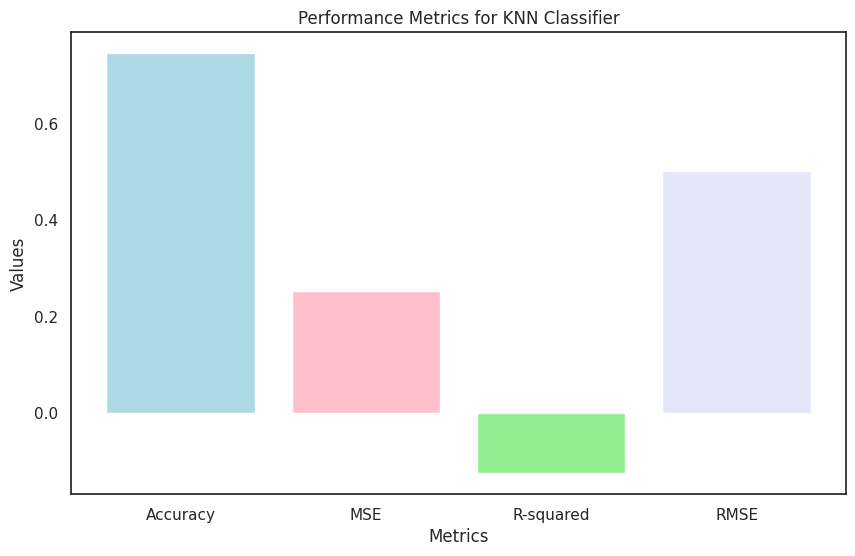

In [74]:
import matplotlib.pyplot as plt

# Define the data
labels = ['Accuracy', 'MSE', 'R-squared', 'RMSE']
values = [knn_accuracy, knn_mse, knn_r_squared, knn_rmse]

# Define colors for the bars
colors = ['lightblue', 'pink', 'lightgreen', '#E6E6FA']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, values, color=colors)
plt.title('Performance Metrics for KNN Classifier')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.show()

# SUPPORT VECTOR REGRESSION

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate predictions
svm_predictions = svm_classifier.predict(X_test_scaled)

# Calculate MSE
svm_mse = mean_squared_error(y_test, svm_predictions)

# Calculate R-squared
svm_r_squared = r2_score(y_test, svm_predictions)

# Calculate RMSE
svm_rmse = np.sqrt(svm_mse)
print("SVM Classifier Metrics:")
print("MSE:", svm_mse)
print("R-squared:", svm_r_squared)
print("RMSE:", svm_rmse)

SVM Classifier Metrics:
MSE: 0.25316455696202533
R-squared: -0.12535612535612572
RMSE: 0.5031546054266276


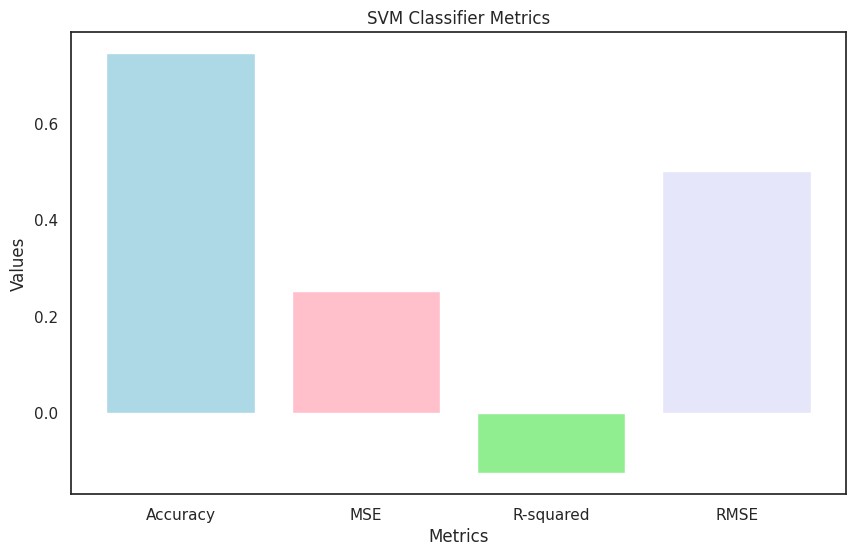

In [69]:
import matplotlib.pyplot as plt

# Define metric values
metrics = ['Accuracy', 'MSE', 'R-squared', 'RMSE']
svm_values = [svm_accuracy, svm_mse, svm_r_squared, svm_rmse]

# Define colors for the bars
colors = ['lightblue', 'pink', 'lightgreen', '#E6E6FA']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, svm_values, color=colors)

# Add titles and labels
plt.title('SVM Classifier Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Display the graph
plt.show()

# LOGISTIC REGRESSION

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate MSE
logreg_mse = mean_squared_error(y_test, logreg_predictions)

# Calculate R-squared
logreg_r_squared = r2_score(y_test, logreg_predictions)

# Calculate RMSE
logreg_rmse = np.sqrt(logreg_mse)

# Print the results
print("Mean Squared Error (MSE):", logreg_mse)
print("R-squared:", logreg_r_squared)
print("Root Mean Squared Error (RMSE):", logreg_rmse)

Mean Squared Error (MSE): 0.22784810126582278
R-squared: -0.012820512820512997
Root Mean Squared Error (RMSE): 0.47733437050543803


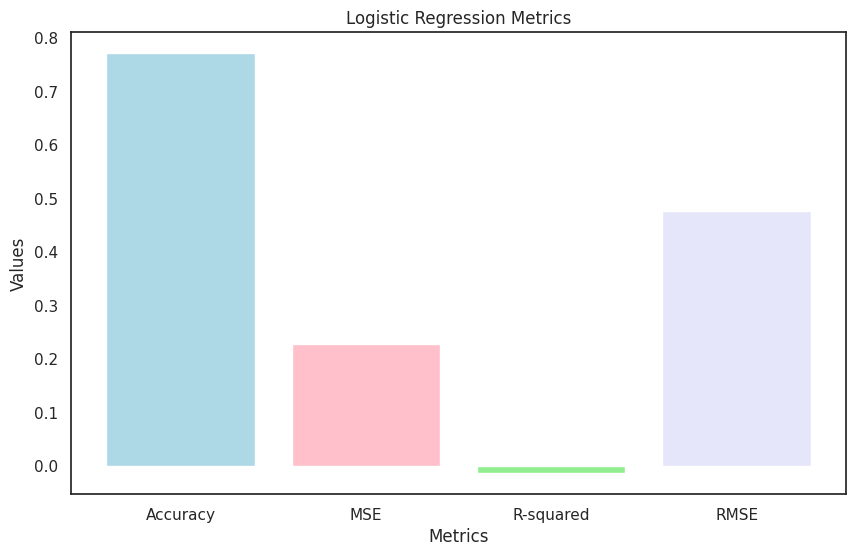

In [73]:
import matplotlib.pyplot as plt

# Define metric values
metrics = ['Accuracy', 'MSE', 'R-squared', 'RMSE']
logreg_values = [logreg_accuracy, logreg_mse, logreg_r_squared, logreg_rmse]

# Define colors for the bars
colors = ['lightblue', 'pink', 'lightgreen', '#E6E6FA']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, logreg_values, color=colors)

# Add titles and labels
plt.title('Logistic Regression Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Display the graph
plt.show()


# DECISION TREE

In [76]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate Mean Squared Error (MSE)
dt_mse = mean_squared_error(y_test, dt_predictions)
print("Decision Tree MSE:", dt_mse)

# Calculate R-squared
dt_r_squared = r2_score(y_test, dt_predictions)
print("Decision Tree R-squared:", dt_r_squared)

# Calculate Root Mean Squared Error (RMSE)
dt_rmse = np.sqrt(dt_mse)
print("Decision Tree RMSE:", dt_rmse)

Decision Tree MSE: 0.2911392405063291
Decision Tree R-squared: -0.2941595441595446
Decision Tree RMSE: 0.5395732021758763


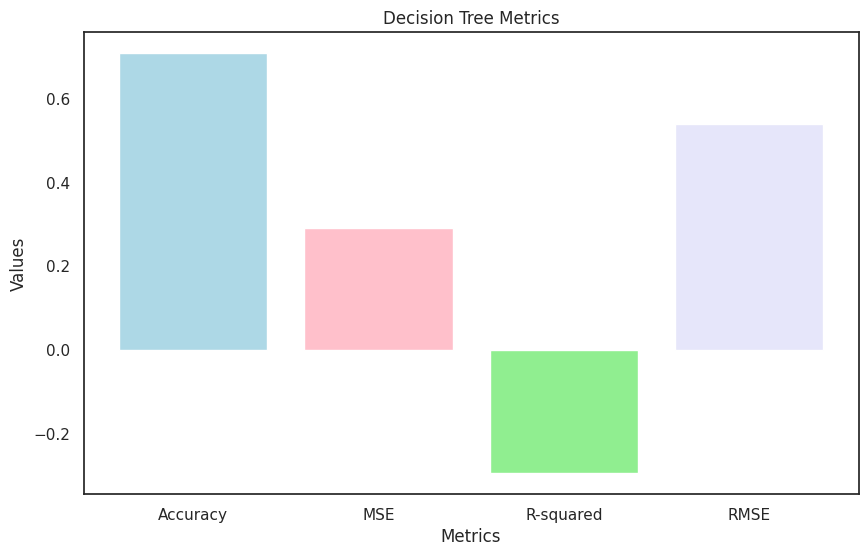

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Define metric values
metrics = ['Accuracy', 'MSE', 'R-squared', 'RMSE']
decision_tree_values = [dt_accuracy, dt_mse, dt_r_squared, dt_rmse]

# Define colors for the bars
colors = ['lightblue', 'pink', 'lightgreen', '#E6E6FA']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, decision_tree_values, color=colors)

# Add titles and labels
plt.title('Decision Tree Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Display the graph
plt.show()


# XGBoost

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate MSE
xgb_mse = mean_squared_error(y_test, xgb_predictions)

# Calculate R-squared
xgb_r_squared = r2_score(y_test, xgb_predictions)

# Calculate RMSE
xgb_rmse = np.sqrt(xgb_mse)

print("XGBoost MSE:", xgb_mse)
print("XGBoost R-squared:", xgb_r_squared)
print("XGBoost RMSE:", xgb_rmse)

XGBoost MSE: 0.26582278481012656
XGBoost R-squared: -0.18162393162393187
XGBoost RMSE: 0.5155800469472481


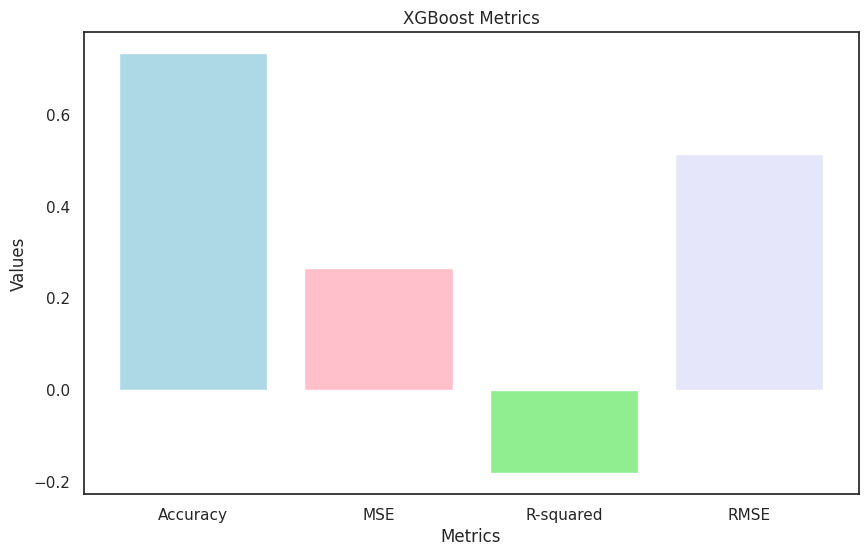

In [80]:
import matplotlib.pyplot as plt

# Define metric values for XGBoost
xgb_values = [xgb_accuracy, xgb_mse, xgb_r_squared, xgb_rmse]

# Define colors for the bars
colors = ['lightblue', 'pink', 'lightgreen', '#E6E6FA']

# Plot the bar graph
plt.figure(figsize=(10, 6))
plt.bar(metrics, xgb_values, color=colors)

# Add titles and labels
plt.title('XGBoost Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')

# Display the graph
plt.show()

# SUMMARY OF ALL THE 6 MODELS

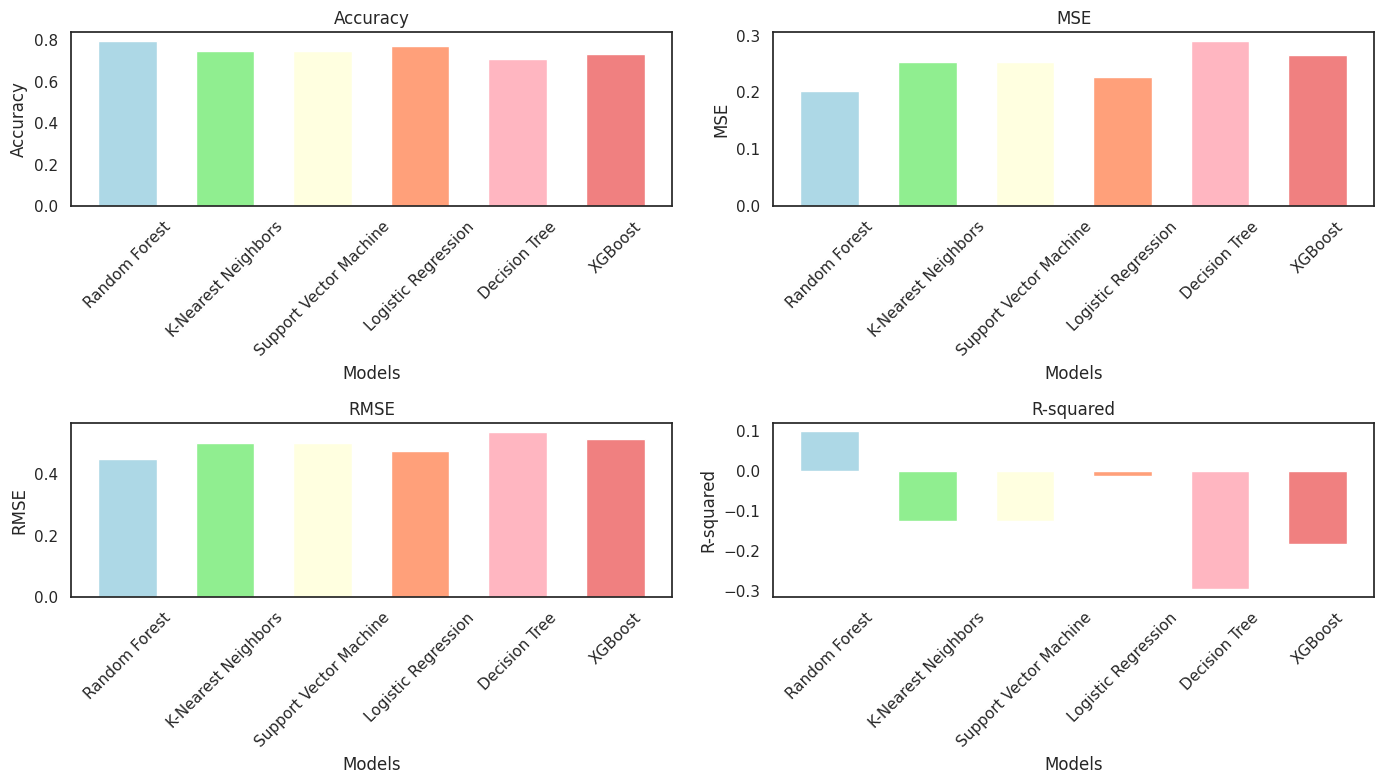

In [95]:
import matplotlib.pyplot as plt

# Define metric values for each model
models = ['Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression', 'Decision Tree', 'XGBoost']
accuracy_values = [rf_accuracy, knn_accuracy, svm_accuracy, logreg_accuracy, dt_accuracy, xgb_accuracy]
mse_values = [rf_mse, knn_mse, svm_mse, logreg_mse, dt_mse, xgb_mse]
rmse_values = [rf_rmse, knn_rmse, svm_rmse, logreg_rmse, dt_rmse, xgb_rmse]
r_squared_values = [rf_r_squared, knn_r_squared, svm_r_squared, logreg_r_squared, dt_r_squared, xgb_r_squared]

# Define colors for the bars
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightsalmon', 'lightpink', 'lightcoral']

# Plot the bar graph
plt.figure(figsize=(14, 8))

# Accuracy
plt.subplot(2, 2, 1)
plt.bar(models, accuracy_values, color=colors, width=0.6)
plt.title('Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# MSE
plt.subplot(2, 2, 2)
plt.bar(models, mse_values, color=colors, width=0.6)
plt.title('MSE')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# R-squared
plt.subplot(2, 2, 4)
plt.bar(models, r_squared_values, color=colors, width=0.6)
plt.title('R-squared')
plt.xlabel('Models')
plt.ylabel('R-squared')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# RMSE
plt.subplot(2, 2, 3)
plt.bar(models, rmse_values, color=colors, width=0.6)
plt.title('RMSE')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees

# Adjust layout
plt.tight_layout()

# Display the graph
plt.show()

# COMPARISON OF CLASSIFIER METRICES

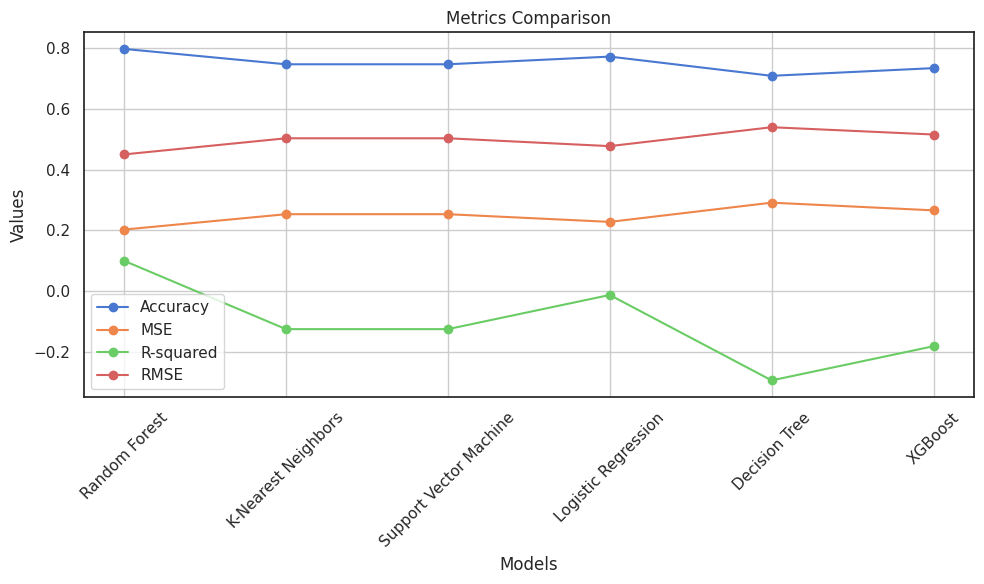

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names
models = ['Random Forest', 'K-Nearest Neighbors', 'Support Vector Machine', 'Logistic Regression', 'Decision Tree', 'XGBoost']

# Define metric values for each model
accuracy_values = [rf_accuracy, knn_accuracy, svm_accuracy, logreg_accuracy, dt_accuracy, xgb_accuracy]
mse_values = [rf_mse, knn_mse, svm_mse, logreg_mse, dt_mse, xgb_mse]
rmse_values = [rf_rmse, knn_rmse, svm_rmse, logreg_rmse, dt_rmse, xgb_rmse]
r_squared_values = [rf_r_squared, knn_r_squared, svm_r_squared, logreg_r_squared, dt_r_squared, xgb_r_squared]

# Plot the table
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy_values, marker='o', label='Accuracy')
plt.plot(models, mse_values, marker='o', label='MSE')
plt.plot(models, r_squared_values, marker='o', label='R-squared')
plt.plot(models, rmse_values, marker='o', label='RMSE')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('Metrics Comparison')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
